In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('ushape.csv')

In [5]:
df = df.rename(columns={
    '3.159499363321345566e-02': 'X',
    '9.869877579082642072e-01': 'Y',
    '0.000000000000000000e+00': 'class',
})

In [7]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


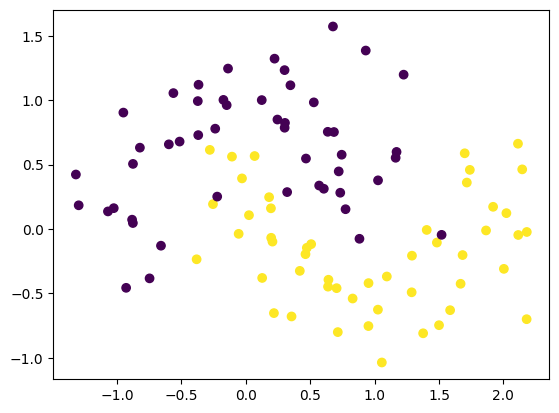

In [12]:
plt.scatter(x='X', y='Y', data=df, c='class')
plt.show()

In [13]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [54]:
model = Sequential()

model.add(Dense(10, activation='tanh', input_dim=2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                30        
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
 dense_24 (Dense)            (None, 10)                110       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.get_weights()

[array([[ 0.12441832,  0.5570037 , -0.32565638,  0.29766446, -0.20134544,
          0.55834395,  0.12093431,  0.61248964, -0.3539843 , -0.09795046],
        [-0.06679267, -0.18156439,  0.66029674,  0.4689992 , -0.4302337 ,
          0.10131431,  0.08636802,  0.20958972, -0.5304255 ,  0.50923425]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.32882243,  0.01509368,  0.41000187,  0.4112661 ,  0.36218423,
          0.1046983 , -0.47782707,  0.3753798 , -0.27829957, -0.45476928],
        [ 0.381391  , -0.06915548,  0.00683647, -0.4728505 ,  0.04324085,
         -0.3444975 ,  0.1906665 ,  0.25647384,  0.0765304 , -0.16832435],
        [-0.15132594, -0.16732523, -0.35818928,  0.39445037, -0.2604787 ,
          0.32093865, -0.25807944,  0.15242612, -0.03297722, -0.41606963],
        [ 0.47730637, -0.49726954, -0.16923219,  0.35410088, -0.01799911,
          0.3638683 , -0.45385686, -0.09550172, -0.23374972,  0.524462  ],
        [ 0.11211

In [56]:
initial_weights = model.get_weights()

In [70]:
import numpy as np

# Initialize the weight list
initial_weights = []

# Initialize the first layer weights: (2, 10)
initial_weights.append(np.random.randn(2, 10) * np.sqrt(1/2))
print(np.random.randn(2, 10) )

# Initialize the bias for the first layer: (10,)
initial_weights.append(np.zeros((10,)))
print(np.zeros((10,)))

# Initialize the second layer weights: (10, 10)
initial_weights.append(np.random.randn(10, 10) * np.sqrt(1/10))

# Initialize the bias for the second layer: (10,)
initial_weights.append(np.zeros((10,)))

# Initialize the third layer weights: (10, 10)
initial_weights.append(np.random.randn(10, 10) * np.sqrt(1/10))

# Initialize the bias for the third layer: (10,)
initial_weights.append(np.zeros((10,)))

# Initialize the fourth layer weights: (10, 10)
initial_weights.append(np.random.randn(10, 10) * np.sqrt(1/10))

# Initialize the bias for the fourth layer: (10,)
initial_weights.append(np.zeros((10,)))

# Initialize the output layer weights: (10, 1)
initial_weights.append(np.random.randn(10, 1) * np.sqrt(1/10))

# Initialize the bias for the output layer: (1,)
initial_weights.append(np.zeros((1,)))

# Set the model weights
model.set_weights(initial_weights)


[[-0.96921821 -0.56443196  1.65056883 -0.79069808  1.66031604 -0.42381906
  -1.42631412 -0.10550536 -2.41502563  1.58518698]
 [ 0.22439264 -0.86391905 -1.49679984  0.70771263  0.04588963  0.09629843
   1.12339981 -1.11209508  0.35965614  0.17061769]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [58]:
model.set_weights(initial_weights)

In [59]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
history = model.fit(X, y, epochs=200, validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 1s 194ms/step - loss: 0.6473 - accuracy: 0.7215 - val_loss: 0.6230 - val_accuracy: 0.8000
Epoch 2/200
3/3 [==============================] - 0s 44ms/step - loss: 0.6316 - accuracy: 0.7595 - val_loss: 0.6046 - val_accuracy: 0.8000
Epoch 3/200
3/3 [==============================] - 0s 45ms/step - loss: 0.6181 - accuracy: 0.7722 - val_loss: 0.5862 - val_accuracy: 0.8000
Epoch 4/200
3/3 [==============================] - 0s 38ms/step - loss: 0.6047 - accuracy: 0.7975 - val_loss: 0.5682 - val_accuracy: 0.8000
Epoch 5/200
3/3 [==============================] - 0s 40ms/step - loss: 0.5917 - accuracy: 0.8101 - val_loss: 0.5508 - val_accuracy: 0.8000
Epoch 6/200
3/3 [==============================] - 0s 41ms/step - loss: 0.5776 - accuracy: 0.8228 - val_loss: 0.5340 - val_accuracy: 0.8000
Epoch 7/200
3/3 [==============================] - 0s 39ms/step - loss: 0.5660 - accuracy: 0.8354 - val_loss: 0.5171 - val_accuracy: 0.8000
Epoch 8/200
3/3 [==

9600/9600 [==============================] - 40s 4ms/step


<Axes: >

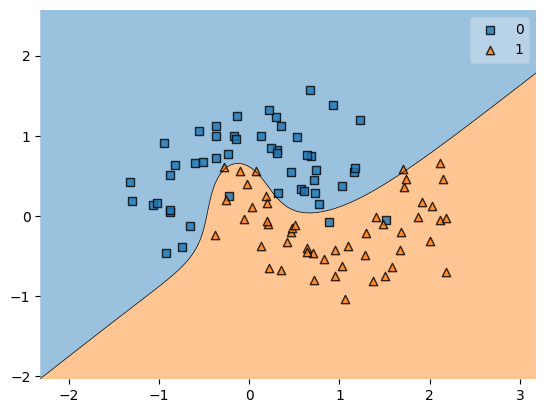

In [61]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values.astype(np.int_), clf=model)